Model Accuracy: 0.93


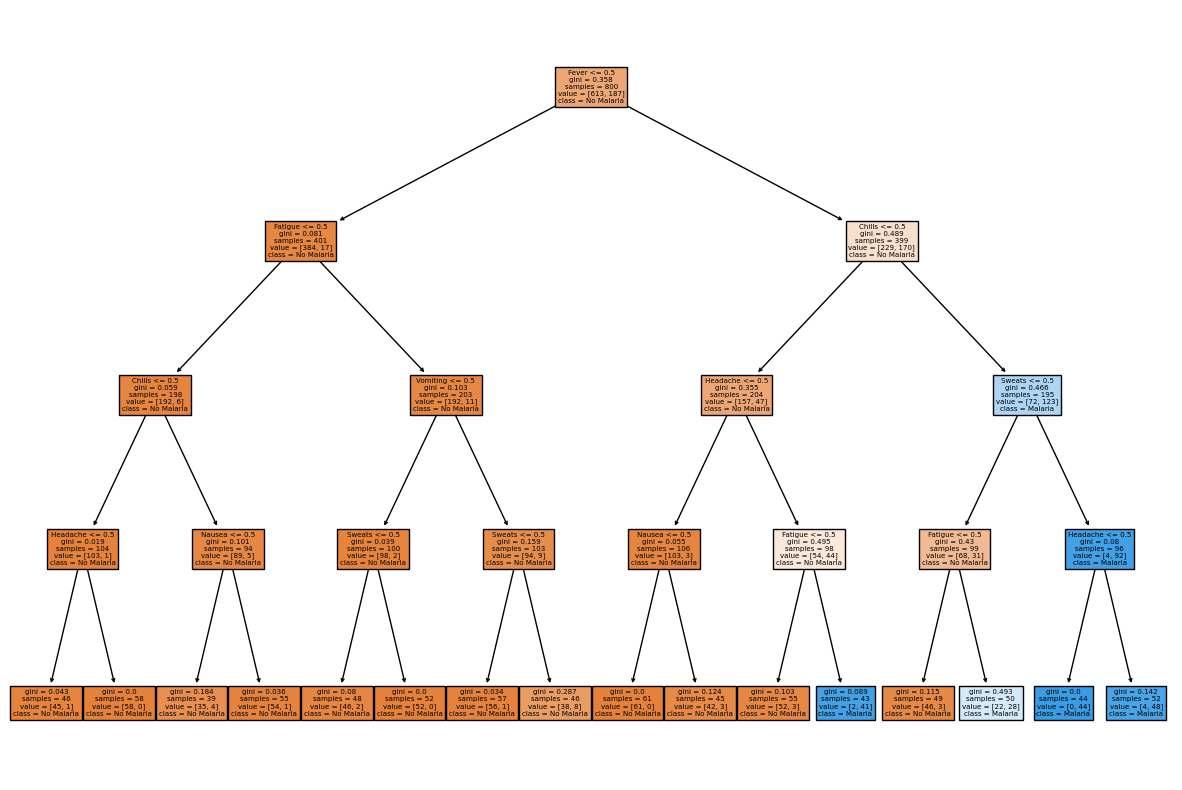

Malaria Diagnosis System
------------------------

Enter symptoms (1 for present, 0 for absent):


Fever:  1
Chills:  0
Headache:  0
Sweats:  0
Nausea:  0
Vomiting:  1
Fatigue:  1
Muscle Pain:  0



Diagnosis Results:
Probability of Malaria: 0.00%
Recommendation: Malaria symptoms not detected.
General Advice:
- Monitor for symptom changes
- Maintain hydration
- Consider other fever causes (flu, typhoid, etc.)
- Consult doctor if symptoms persist


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration
np.random.seed(42)
num_samples = 1000

# Features: [fever, chills, headache, sweats, nausea, vomiting, fatigue, muscle_pain]
# 1 = symptom present, 0 = symptom absent
X = np.random.randint(0, 2, size=(num_samples, 8))

# Target: 1 = Malaria, 0 = Not Malaria
# Define Malaria cases based on common symptoms combination
y = np.zeros(num_samples)
for i in range(num_samples):
    if X[i, 0] == 1 and X[i, 1] == 1 and X[i, 3] == 1:  # Fever + chills + sweats
        y[i] = 1
    elif X[i, 0] == 1 and X[i, 2] == 1 and X[i, 6] == 1:  # Fever + headache + fatigue
        y[i] = 1

# Add some noise
y = np.where(np.random.rand(num_samples) < 0.05, 1 - y, y)

# Create DataFrame for better visualization
feature_names = ['Fever', 'Chills', 'Headache', 'Sweats', 'Nausea', 'Vomiting', 'Fatigue', 'Muscle Pain']
df = pd.DataFrame(X, columns=feature_names)
df['Malaria'] = y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['No Malaria', 'Malaria'])
plt.show()

# Function to get user input and make prediction
def diagnose_malaria():
    print("\nEnter symptoms (1 for present, 0 for absent):")
    symptoms = []
    for symptom in feature_names:
        val = int(input(f"{symptom}: "))
        symptoms.append(val)
    
    prediction = clf.predict([symptoms])
    probability = clf.predict_proba([symptoms])[0][1]
    
    print("\nDiagnosis Results:")
    print(f"Probability of Malaria: {probability:.2%}")
    
    if prediction[0] == 1:
        print("Recommendation: Likely Malaria infection detected.")
        print("Immediate Actions:")
        print("- Seek urgent medical attention")
        print("- Antimalarial medication (e.g., Artemisinin-based combination therapy)")
        print("- Stay hydrated and rest")
        print("- Monitor for severe symptoms (e.g., convulsions, difficulty breathing)")
    else:
        print("Recommendation: Malaria symptoms not detected.")
        print("General Advice:")
        print("- Monitor for symptom changes")
        print("- Maintain hydration")
        print("- Consider other fever causes (flu, typhoid, etc.)")
        print("- Consult doctor if symptoms persist")

# Run the diagnosis interface
if __name__ == "__main__":
    print("Malaria Diagnosis System")
    print("------------------------")
    diagnose_malaria()